In [1]:
import pandas as pd
from pathlib import Path

import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/afs/desy.de/user/a/axelheim/private/run_BaumBauenNotebooks')



from tb_to_csv import tabulate_metrics
from plot_fcts import curve_plot, multi_metric_bar_plot

In [2]:
plot_path = "/afs/desy.de/user/a/axelheim/private/run_HcX_globTag/"

nfs_path = "/nfs/dust/belle2/user/axelheim/BranchSeparator/run_HcX_globTag/"


data_name = "TSD_15k_each_6trees_IDs_charge"

In [3]:
writer_dir = Path((nfs_path + 'tb_logs/' + data_name))
writer_dir.mkdir(parents=True, exist_ok=True)

csv_dir = Path((nfs_path + 'tb_csv/' + data_name))
csv_dir.mkdir(parents=True, exist_ok=True)

plot_path = Path((plot_path + 'plots/' + data_name))
plot_path.mkdir(parents=True, exist_ok=True)

tb_metrics = tabulate_metrics(writer_dir, csv_dir)

Converting run 512_0.001_128_0.3_10

- Done
Converting run 1024_0.001_128_0.3_10

- Done
Converting run 512_0.001_128_0.3_12

- Done
Converting run 512_0.001_128_0.3_8

- Done
Converting run 512_0.0001_128_0.3_4

- Done
Converting run 1024_0.001_128_0.3_8

- Done
Converting run 1024_0.001_128_0.3_12

- Done


In [11]:
for i in range(len(tb_metrics)):
    print(i,":", len(tb_metrics[i]))

0 : 151
1 : 57
2 : 143
3 : 151
4 : 254
5 : 104
6 : 51


In [12]:
one_run = tb_metrics[3]

print("Number of rows/epochs: ", len(one_run))
one_run

Number of rows/epochs:  151


,time_stamp,Epoch,Cross Entropy/Training,Accuracy/Training,PerfectSA/Training,SA1F/Training,SA2F/Training,SA3F/Training,SAbad/Training,Mbc Peak Fraction/Training,Cross Entropy/Validation,Accuracy/Validation,PerfectSA/Validation,SA1F/Validation,SA2F/Validation,SA3F/Validation,SAbad/Validation
0,1.623325e+09,1,0.713325,0.633127,0.154026,0.216704,0.234642,0.189768,0.204859,0.0,0.716409,0.631496,0.154241,0.211533,0.244048,0.183482,0.206696
1,1.623325e+09,2,0.707763,0.638894,0.155583,0.242010,0.221997,0.174825,0.205586,0.0,0.711103,0.639198,0.153795,0.243899,0.230804,0.171801,0.199702
2,1.623325e+09,3,0.662139,0.656232,0.172764,0.228920,0.238911,0.185973,0.173432,0.0,0.665881,0.655128,0.172545,0.229687,0.242485,0.181622,0.173661
3,1.623325e+09,4,0.638382,0.683789,0.201791,0.236673,0.247762,0.175477,0.138298,0.0,0.640286,0.681080,0.197619,0.245015,0.243750,0.171652,0.141964
4,1.623325e+09,5,0.586452,0.721101,0.238763,0.255693,0.250934,0.160816,0.093794,0.0,0.590254,0.720384,0.236979,0.256845,0.258631,0.154315,0.093229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,1.623345e+09,147,0.043855,0.983607,0.932074,0.045511,0.017952,0.002995,0.001468,0.0,0.057594,0.977766,0.917485,0.049777,0.022321,0.006696,0.003720
147,1.623345e+09,148,0.041233,0.984846,0.936433,0.043228,0.016277,0.002906,0.001156,0.0,0.054459,0.979056,0.921280,0.048214,0.021280,0.005655,0.003571
148,1.623345e+09,149,0.039344,0.985565,0.939175,0.041761,0.015136,0.002861,0.001067,0.0,0.052568,0.979944,0.924107,0.047173,0.020015,0.005283,0.003423
149,1.623345e+09,150,0.043086,0.983977,0.933349,0.044844,0.017448,0.002980,0.001379,0.0,0.056838,0.978114,0.918601,0.049182,0.022247,0.006027,0.003943


In [13]:
one_run['PerfectSA/Validation'] + one_run['SA1F/Validation'] + one_run['SA2F/Validation'] + one_run['SA3F/Validation'] + one_run['SAbad/Validation'] 

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
146    1.0
147    1.0
148    1.0
149    1.0
150    1.0
Length: 151, dtype: float64

In [14]:
epochs = one_run['Epoch']
loss_tr = one_run['Cross Entropy/Training']
loss_val = one_run['Cross Entropy/Validation']



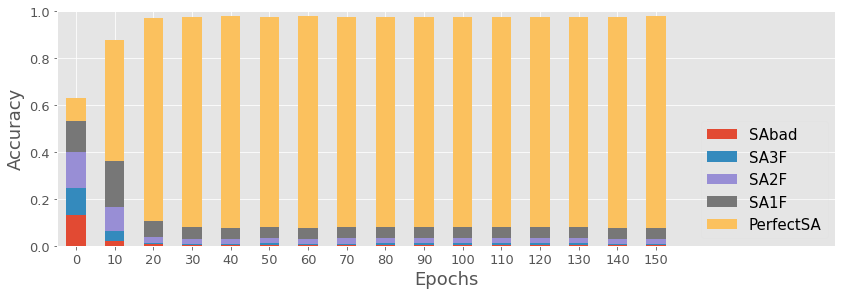

In [15]:
multi_metric_bar_plot(one_run, plot_path, ('barplot_metrics_' + data_name), data_type="Validation", step=10, metric_type="SA")

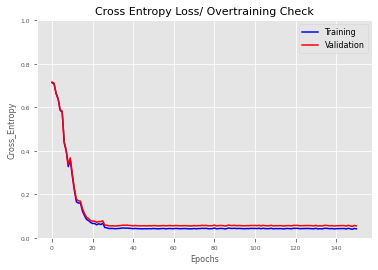

In [16]:
curve_plot(loss_tr, loss_val, plot_path, ('loss_comparison_' + data_name), 'Cross_Entropy', 'Cross Entropy Loss/ Overtraining Check')

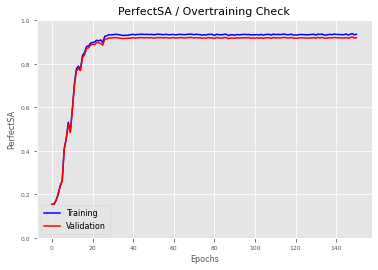

In [17]:
pLCA_tr = one_run['PerfectSA/Training']
pLCA_val = one_run['PerfectSA/Validation']


curve_plot(pLCA_tr, pLCA_val, plot_path, ('perfectSA_comparison_' + data_name), 'PerfectSA', 'PerfectSA / Overtraining Check')